In [12]:
#Loading assembly keywords and functions
%run '../pyssemble/pyInstruction.py'
#Alternative: from pyssemble.pyInstruction import *

In [13]:
py_inst = pyInstruction() #only useful for debugging later on

## Simple Assembly commands li, add, sub

In [14]:
li(a1, 5)
li(a2, 6)
add(a3, a1, a2)

In [15]:
py_inst.execute()

In [19]:
py_inst.regs[a3]

11

In [72]:
def lambda_wrap(func):
    return func

In [75]:
lambda_wrap(lambda args: args[0]+args[1])((2,3))

5

In [63]:
class counter:
    def __init__(self, val=0):
        self.val = val
    def step(self):
        self.val+=4

In [64]:
class t1:
    ram1 = [0]*32
    inst ={}
    pc =counter()
    def execut(self):
        for j in self.inst:
            i=self.inst[j]
            self.ram1[i[0]] = i[2]((self.ram1[i[1][0]], self.ram1[i[1][0]]))

class t2(t1):
    def __init__(self, *args):
        if (len(args)!=3):
            raise Exception
        self.rd, self.rs1, self.rs2 = args
        self.inst[self.pc] = self #(self.rd, (self.rs1, self.rs2), self.func)
        self.pc.step()
    def execute(self):
        f = self.func
        self.ram1[self.rd] = f(self.ram1[self.rs1], self.ram1[self.rs2])

class t3(t2):
    func = lambda _, arg1, arg2: arg1 + arg2


In [65]:
t = t1()

In [66]:
t.ram1[2]=4
t.ram1[3]=3

In [67]:
t3(1,2,3)

In [99]:
t.inst[0].execute()

In [26]:
t.ram1

[0,
 0,
 4,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [69]:
t.pc.val

4

In [30]:
t.inst

{0: <__main__.t3 at 0x1133640a0>}

In [48]:
t3(2,3,4).pc

4

In [110]:
import random
import copy

In [111]:
user = [f"user{i}" for i in range(5)]
company = [f"company{i}" for i in range(10)]

In [171]:
platform_fund = 500

In [112]:
company_fund = {c: random.randint(5000, 10000) for c in company}
user_fund = {u: random.randint(1000, 2000) for u in user}

In [113]:
company_fund_init = copy.deepcopy(company_fund)
user_fund_init = copy.deepcopy(user_fund)

In [114]:
esg_score = {com:random.randint(200, 1000) for com in company}
company_esg_budget_plan = {com:random.randint(10,15) for com in company}

In [129]:
"""Properties
Continuous monotonic and converge to 1000 at infinity
"""
target_func = lambda x: 0.1*1000*x/(1+0.1*x)
target_inv = lambda x: x/(0.1*1000-0.1*x)

In [132]:
esg_score_target = {
    com:round(target_func(
        target_inv(esg_score[com])+
        0.05*(company_esg_budget_plan[com]/100)*company_fund_init[com]
        )) for com in company
    }

In [133]:
{com:(company_fund_init[com], esg_score[com], company_esg_budget_plan[com], esg_score_target[com]) for com in company}

{'company0': (7792, 938, 14, 954),
 'company1': (8507, 765, 13, 898),
 'company2': (7736, 438, 14, 861),
 'company3': (7015, 217, 10, 791),
 'company4': (7545, 658, 12, 866),
 'company5': (9806, 722, 15, 909),
 'company6': (5885, 512, 15, 845),
 'company7': (7007, 359, 10, 803),
 'company8': (9796, 342, 12, 865),
 'company9': (8780, 497, 13, 870)}

In [134]:
user_invest_percent = {u:random.randint(50,80) for u in user}

In [139]:
investment = {}
for u in user:
    for c in company:
        investment[(u,c)] = (user_invest_percent[u]/1000)*user_fund[u]*(esg_score_target[c]/1000)

In [140]:
investment_by_user = {u: sum([investment[(u,c)] for c in company]) for u in user}

In [141]:
investment_by_company = {c: sum([investment[(u,c)] for u in user]) for c in company}

In [142]:
total_investment = sum(investment.values())
total_investment

3718.267444

In [146]:
#investment transferred
for u in user:
    user_fund[u] -= investment_by_user[u]
for c in company:
    company_fund[c] += investment_by_company[c]

In [152]:
#after a quarter company worked, gained profit/loss, new esg score 
profit_percent = {c: random.randint(-5, 10) for c in company}
esg_score_new = {
    c: round(
        target_func(
            target_inv(esg_score[c]+random.randint(-50,50))+
            0.04*((company_esg_budget_plan[c]+random.randint(-2,2))/100)*company_fund[c]
        )
    ) 
    for c in company}

In [158]:
{com:(company_fund_init[com], esg_score[com], company_esg_budget_plan[com], esg_score_target[com], esg_score_new[com]) for com in company}

{'company0': (7792, 938, 14, 954, 950),
 'company1': (8507, 765, 13, 898, 902),
 'company2': (7736, 438, 14, 861, 838),
 'company3': (7015, 217, 10, 791, 750),
 'company4': (7545, 658, 12, 866, 857),
 'company5': (9806, 722, 15, 909, 898),
 'company6': (5885, 512, 15, 845, 840),
 'company7': (7007, 359, 10, 803, 791),
 'company8': (9796, 342, 12, 865, 845),
 'company9': (8780, 497, 13, 870, 867)}

In [156]:
#update company fund for profit
for c in company:
    company_fund[c] += profit_percent[c]*company_fund[c]/100

In [176]:
#company return back the investments plus they get reward
#for exceeding target, punishment for not reaching target
#note: total rewards <= total punishment
company_score_diff = {c:esg_score_new[c] - esg_score_target[c] for c in company}
#Allow upto 5 negative points 
company_score_diff = {c: company_score_diff[c] if company_score_diff[c]>=0 else min(0, 5+company_score_diff[c]) for c in company}
company_reward = {c: max(company_score_diff[c], 0) for c in company}
company_punish = {c: max(-company_score_diff[c], 0) for c in company}
total_reward, total_punish = sum(company_reward.values()), sum(company_punish.values())
reward_punish_ratio = 0.7
company_reward = {c: reward_punish_ratio*company_reward[c]/total_reward  for c in company} #total rewards = 0.7* total punishment
company_punish = {c: company_punish[c]/total_punish for c in company}
esg_company_total_rewards = 0.1 * total_investment
for c in company:
    company_fund[c] -= (investment_by_company[c] + company_punish[c]*esg_company_total_rewards - company_reward[c]*esg_company_total_rewards)
platform_fund += (total_investment + (1 - reward_punish_ratio)* esg_company_total_rewards)

In [180]:
{com:(user_fund_init[com], user_fund[com]) for com in user}

{'user0': (1391, 656.020638),
 'user1': (1348, 717.4756960000001),
 'user2': (1960, 907.3937599999999),
 'user3': (1416, 692.341872),
 'user4': (1305, 728.5005900000001)}

In [189]:
esg_score_diff = {c:esg_score_new[c] - esg_score[c] for c in company}
dict(sorted(esg_score_diff.items(),key=lambda x: x[1]))

{'company0': 12,
 'company1': 137,
 'company5': 176,
 'company4': 199,
 'company6': 328,
 'company9': 370,
 'company2': 400,
 'company7': 432,
 'company8': 503,
 'company3': 533}

In [201]:
esg_score_diff = {c: target_inv(esg_score_new[c]) - target_inv(esg_score[c]) for c in company}
max_diff = max(esg_score_diff.values())
esg_score_dist = {c: 0.6*esg_score_diff[c]/max_diff + 0.4*esg_score_new[c]/1000 for c in company}
total_score = sum(esg_score_dist.values())
esg_score_dist = {c: 0.98*esg_score_dist[c]/total_score for c in company}

In [202]:
total_user_dist = total_investment + reward_punish_ratio*(1 - reward_punish_ratio)* esg_company_total_rewards

In [208]:
investment_ratio = {
    (u,c): investment[(u,c)]/investment_by_company[c] for c in company for u in user
}
user_dist = {
    u: sum([
        investment_ratio[(u,c)]*esg_score_dist[c]*total_user_dist for c in company
    ]) for u in user
}

In [214]:
for u in user:
    user_fund[u] += user_dist[u]
    platform_fund -= user_dist[u]

In [215]:
platform_fund

609.391428202481

In [62]:
def rev(head:Llist):
    curr = head 
    prev = None
    while curr != None:
        temp = curr.next
        curr.next = prev
        prev = curr
        curr = temp
    return prev

In [23]:
class Llist:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next
    def __repr__(self):
        return f"[{self.value}, {self.next}]"
    def __str__(self):
        return self.__repr__()

In [63]:
test1 = Llist('a', Llist('b', Llist('c', Llist('d'))))
imm = test1

In [64]:
test1

[a, [b, [c, [d, None]]]]

In [67]:
imm

[a, None]

In [66]:
rev(test1)

[d, [c, [b, [a, None]]]]

In [82]:
class Btree:
    def __init__(self, value, left=None, right = None):
        assert(left == None or isinstance(left, Btree))
        assert(right == None or isinstance(right, Btree))
        self.value = value
        self.left = left
        self.right = right

    def __repr__(self):
        return f'[{self.left}-{self.value}-{self.right}]'

In [83]:
test2 = Btree(
    2, 
    Btree(
        3, 
        Btree(
            4, 
            Btree(5)
        ),
        Btree(6)
    ),
    Btree(
        7,
        Btree(8),
        Btree(9)
    )
)

In [84]:
print(test2)

[[[[None-5-None]-4-None]-3-[None-6-None]]-2-[[None-8-None]-7-[None-9-None]]]


In [86]:
def invTree(tree:Btree):
    if (tree == None):
        return
    left = invTree(tree.left)
    right = invTree(tree.right)
    tree.left = right
    tree.right = left
    return tree

In [87]:
invTree(test2)

[[[None-9-None]-7-[None-8-None]]-2-[[None-6-None]-3-[None-4-[None-5-None]]]]

In [88]:
import networkx as nx
import matplotlib.pyplot as plt


In [89]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])


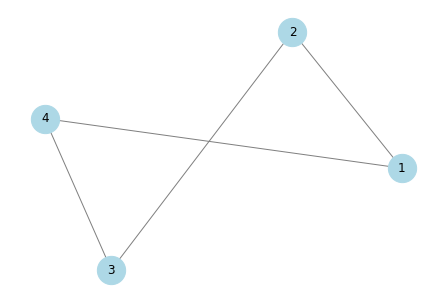

In [90]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray')


In [91]:
plt.show()